In [ ]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

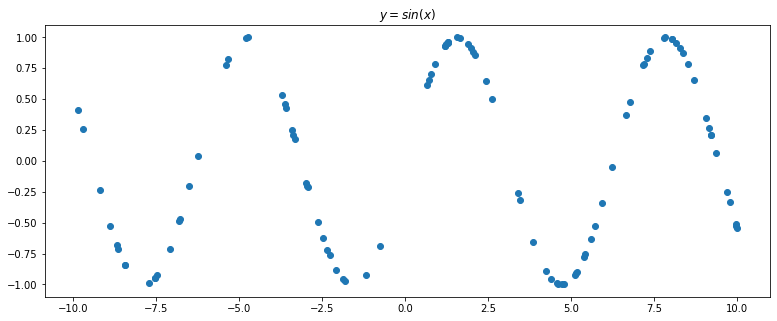

In [ ]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

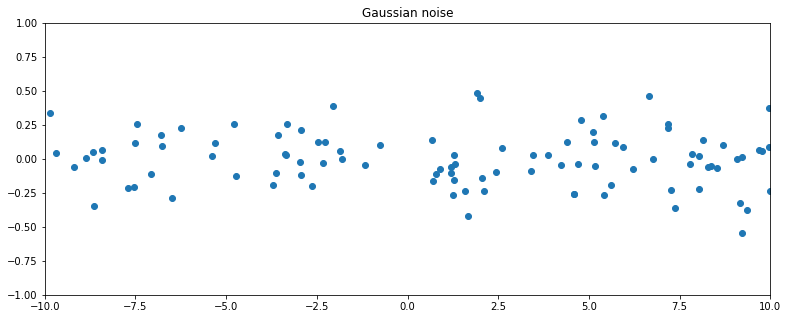

In [ ]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

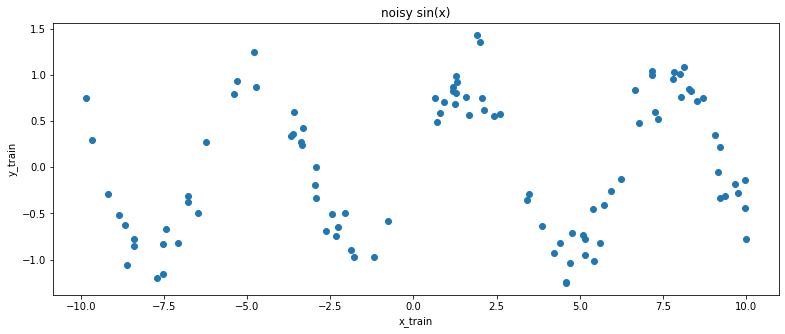

In [ ]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [ ]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

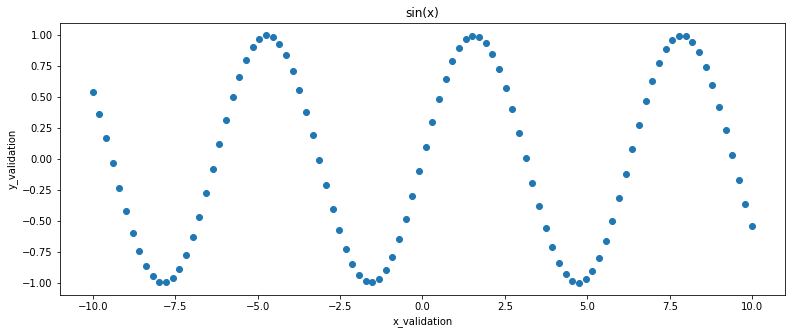

In [ ]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [ ]:
# задача восстановления синуса
class SineNet(torch.nn.Module):
    # инициализируем слои
    def __init__(self, n_hidden_neurons):
        # предполагаем что все слои будут одинакового размера n_hidden_neurons
        super(SineNet, self).__init__() # инициализируем родительский объект
        # fully connected слой - полносвязный слой, в PyTorch - Linear
        # передаем кол-во входных (координата) и выходных нейронов 
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) 
        # функция активации
        self.act1 = torch.nn.Sigmoid()
        # еще один слой с ответом (координата)
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    # то как наши слои последовательно применяются
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
        # повторяет иициализацию

sine_net = SineNet(50) # передаем кол-во скрытых слоев

# Prediction

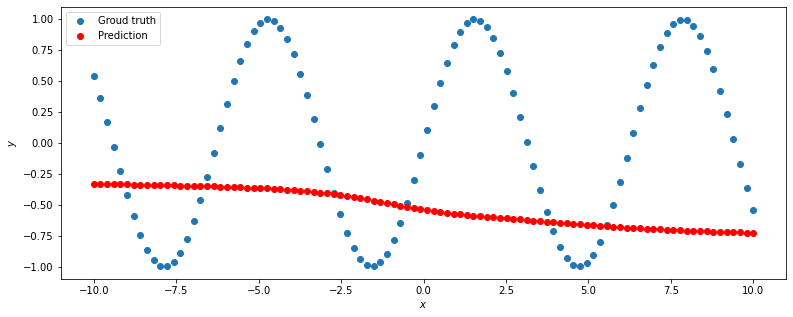

In [ ]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

# Optimizer

In [ ]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# SGD

# передаем те параметры, которые хотим модифицировать 
# параметры которые хотим обучать в нейросети
# ВЕСА НЕЙРОНОВ

# Loss function

In [ ]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure

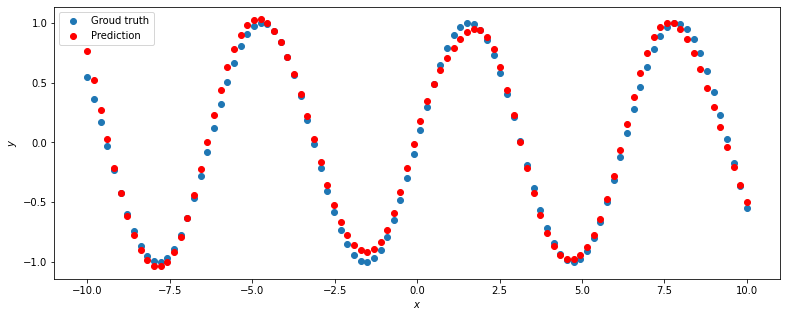

In [ ]:
sine_net = SineNet(20) # передаем кол-во скрытых слоев
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

for epoch_index in range(2000):
    # обнуляем градиент  
    optimizer.zero_grad()

    # 
    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    # 
    loss_val.backward()

    optimizer.step()
predict(sine_net, x_validation, y_validation)

# Обучим нейронную сеть для задачи регрессии:

Возьмем более сложную функцию в качестве таргета: $y=2^x sin(2^{-x})y$.

Кроме того, мы хотим получить хорошую метрику $MAE$ на валидации: 
$$ {MAE} = {\frac {1}{l}}\sum _{i=1}^{l}{|y\_pred_{i}-{y\_target_{i}}|}$$
тогда как знакомая нам MSE выглядит как 
$$ {MSE} = {\frac {1}{l}}\sum _{i=1}^{l}(y\_pred_{i}-{y\_target_{i}})^{2} $$ 

Вот пример того, как нейросеть может отрабатывать на данной функции:

![jupyter](https://ucarecdn.com/9adeea4b-ed9a-468f-a6d1-2191c1c21e4b/)

Данный пример показывает $MAE$ на валидации $~0.021$ . Получите метрику не хуже $0.03$

Что можно варьировать: 
* Архитектуру сети
* loss-функцию
* lr оптимизатора
* Количество эпох в обучении

In [2]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [25]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__() 
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) 
        self.tanh1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        # self.act2 = torch.nn.Sigmoid()
        # self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh1(x)
        x = self.fc2(x)
        # x = self.act2(x)
        # x = self.fc3(x)
        return x

net = RegressionNet(50)

Text(0, 0.5, '$y$')

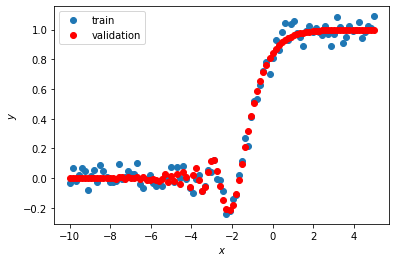

In [10]:
# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

plt.plot(x_train.numpy(), y_train.numpy(), 'o', label='train')
plt.plot(x_validation.numpy(), y_validation.data.numpy(), 'o', c='r', label='validation');
plt.legend(loc='upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')

0.02487640455365181
0.04753973335027695
0.02487640455365181


Text(0, 0.5, '$y$')

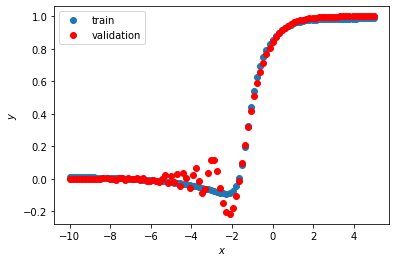

In [97]:
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__() 

        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) 
        self.tanh1 = torch.nn.Tanh()
        # self.act1 = torch.nn.Sigmoid()
        
        # self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        # self.tanh2 = torch.nn.Tanh()
        # self.act2 = torch.nn.Sigmoid()
        
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.tanh3 = torch.nn.Tanh()
        # self.act3 = torch.nn.Sigmoid()

        self.fc4 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        # self.tanh4 = torch.nn.Tanh()
        self.act4 = torch.nn.Sigmoid()
        
        self.fc5 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):

        x = self.fc1(x)
        x = self.tanh1(x)
        # x = self.act1(x)
      
        # x = self.fc2(x)
        # x = self.tanh2(x)
        # x = self.act2(x)
      
        x = self.fc3(x)
        x = self.tanh3(x)
        # x = self.act3(x)
      
        x = self.fc4(x)
        # x = self.tanh4(x)
        x = self.act4(x)
      
        x = self.fc5(x)
        return x

net = RegressionNet(50)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target): # MAE
    res = (pred - target).abs()
    return res.mean()

l = []

for epoch_index in range(65):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)

    l.append(loss_value.data)
    
    loss_value.backward()
    optimizer.step()

# Проверка осуществляется вызовом кода:
def metric(pred, target):
   return (pred - target).abs().mean()
print(metric(net.forward(x_validation), y_validation).item())
# (раскомментируйте, если решаете задание локально)

y_pred = net.forward(x_train)
print(metric(y_pred, y_train).item())

y_pred = net.forward(x_validation)
print(metric(y_pred, y_validation).item())

plt.plot(x_validation.detach().numpy(), y_pred.detach().numpy(), 'o', label='train')
plt.plot(x_validation.detach().numpy(), y_validation.detach().numpy(), 'o', c='r', label='validation');
plt.legend(loc='upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')

Text(0, 0.5, '$LOSS$')

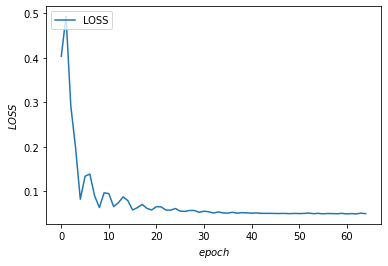

In [86]:
plt.plot(l, label = 'LOSS')
plt.legend(loc='upper left')
plt.xlabel('$epoch$')
plt.ylabel('$LOSS$')